<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab06_SoftmaxClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab06: Softmax Classifier**

https://github.com/WONYOUNG-SONG/DeepLearningZeroToAll/blob/master/tf2/tf2-06-1-softmax_classifier.py

Binary classification only has a result of **0 or 1**, i.e. it finds only two classes, like a or not, b or not.

<div>
  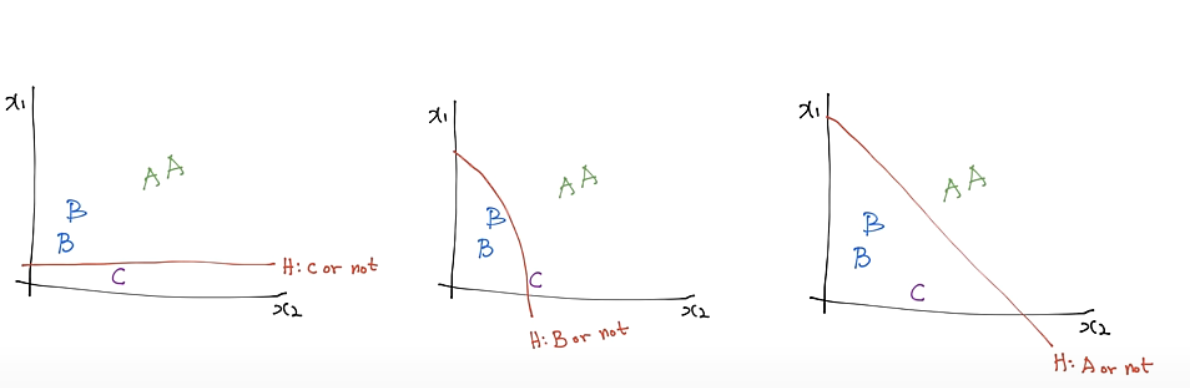
</div>

**Use matrix to implement classifiers**

<div>
  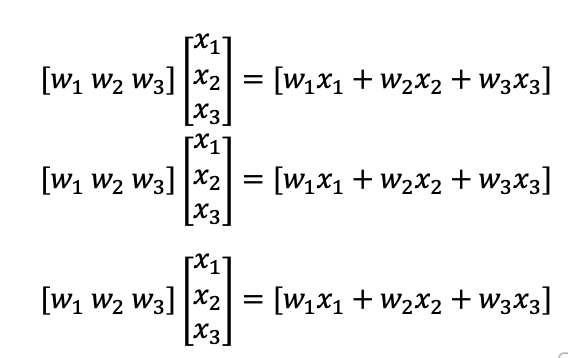
</div>

It is a little complicated to make it individually, so we can combine the matrix using **dot product**.

<div>
  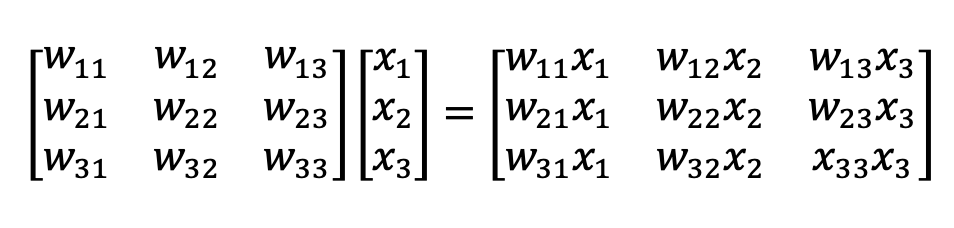
</div>

Then, we get the result:

<div>
  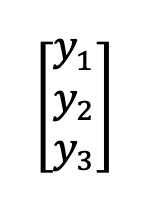
</div>

Can we use sigmoid for this case?

**The answer is no, it's because sigmoid is pretty hard to use this since the outputs don't add up to 1.**

<div>
  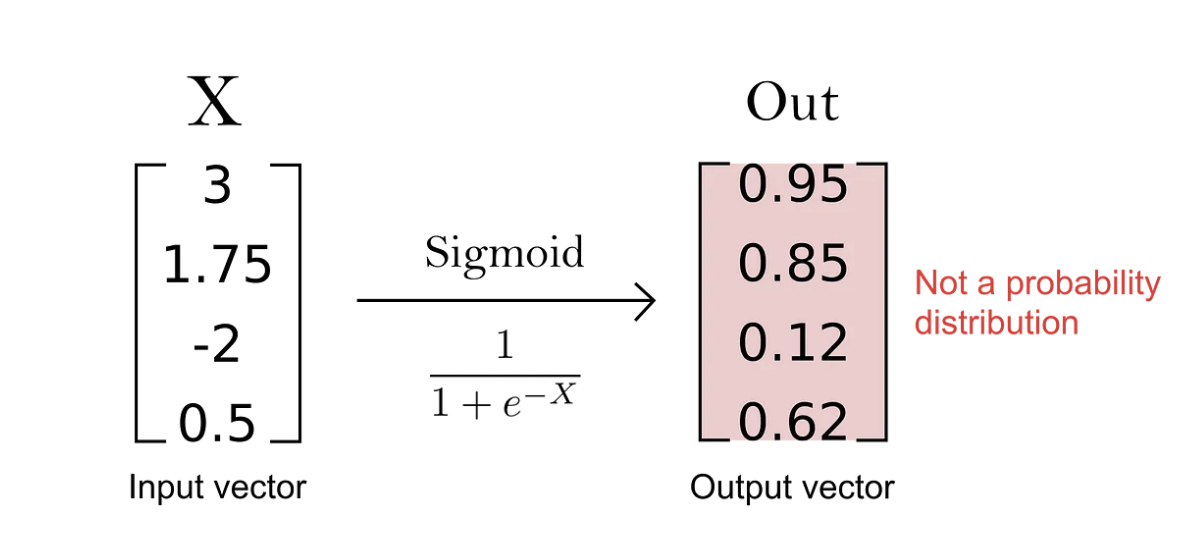
</div>

**Then what should we use?**



In [ ]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np

x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_data = np.array(x_raw, dtype=np.float32)
y_data = np.array(y_raw, dtype=np.float32)

nb_classes = 3

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=4, units=nb_classes, use_bias=True))  # use_bias is True, by default

# use softmax activations: softmax = exp(logits) / reduce_sum(exp(logits), dim)
tf.model.add(tf.keras.layers.Activation('softmax'))

# use loss == categorical_crossentropy
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=2000)

print('--------------')
# Testing & One-hot encoding
a = tf.model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

print('--------------')
b = tf.model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

print('--------------')
# or use argmax embedded method, predict_classes
c = tf.model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = np.argmax(c, axis=-1)
print(c, c_onehot)

print('--------------')
all = tf.model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = np.argmax(all, axis=-1)
print(all, all_onehot)